# Question 8
In this notebook I solve question 8, where I explore smaller values of $\epsilon$


In [1]:
import numpy as np
import scipy as sp
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

### I start by defining the ploblem parameters

In [2]:
### Parameters ###
## domain
Lp = -1
L = 1
##bonduary conditions
u_x0 = 0
u_x1 = 0

## initial condition
def legendre_pol_3(x_vec, b_vec):
    LP_vec = []
    LP0 =  b_vec[0]
    for x in x_vec:
        LP1 = b_vec[1]*x
        LP2 = b_vec[2]*((3.0/2.0)*x*x - 0.5)
        LP3 = b_vec[3]*((5.0/2.0)*(x**3) - (3.0/2.0)*x*x)
        LP_vec.append(LP0 + LP1 + LP2 + LP3)

    min_LP = min(LP_vec)
    if min_LP < 0:
        # the constant C = abs(min_LP), but because I alredy test that min_LP is negative, them I am just subtracting it from LP values
        LP_vec = [x - min_LP for x in LP_vec]
    return LP_vec

def initial_condition (x_vec, b_vec):
    LP_vec = legendre_pol_3(x_vec, b_vec)
    IC_vec = []
    for x,LP in zip(x_vec, LP_vec):
        IC_vec.append(((1 - x)**4)*(1+x)*LP)
    return IC_vec
 
## equation parameters
a = 1
epsilon = 1e-3

## max t
T_max = 1
delta_t = 0.0012

##run parameters
J = 40
delta_x = (L- Lp)/float(J)

x_values = []
for j in range(J+1):
    x = Lp + j*delta_x
    x_values.append(x)



### Implementation of the $\Theta$--method

In [3]:
def Un1_theta_method (Un_vec, delta_t, delta_x, theta = 1/2,a = 1,epsilon = 1e-3):
    m = len(Un_vec) - 2
    A = np.zeros((m,m))
    b = np.zeros((m,1))
    
    mu = delta_t/(delta_x*delta_x)
    nu = delta_t/delta_x
    
    ##first term k = 0, j = 1
    A[0,0] = 1.0 + (theta*nu*a) + (2.0*theta*epsilon*mu)
    A[0,1] = -theta*(nu*a + epsilon*mu)

    b[0] = (1 - (1-theta)*(nu*a + 2.0*epsilon*mu))*Un_vec[1] +  (1-theta)*(epsilon*mu)*Un_vec[0]  +  (1-theta)*( nu*a + epsilon*mu)*Un_vec[2]

    ##midle_terms k = [1,m-2] j = k + 1
    for k in range(m - 1):
        j = k+1
        A[k,k] =  1.0 + (theta*nu*a) + (2.0*theta*epsilon*mu)
        A[k,k+1] = -theta*(nu*a + epsilon*mu)
        A[k,k-1] = -theta*(epsilon*mu)
        
        b[k] =  (1 - (1-theta)*(nu*a + 2.0*epsilon*mu))*Un_vec[j] +  (1-theta)*(epsilon*mu)*Un_vec[j-1]  +  (1-theta)*( nu*a + epsilon*mu)*Un_vec[j+1]

    ##last term k = m-1, j = m
    A[m-1,m-1] = 1.0 + (theta*nu*a) + (2.0*theta*epsilon*mu)
    A[m-1,m-2] = -theta*(epsilon*mu)

    j = m
    b[m-1] =  (1 - (1-theta)*(nu*a + 2.0*epsilon*mu))*Un_vec[j] +  (1-theta)*(epsilon*mu)*Un_vec[j-1]  +  (1-theta)*( nu*a + epsilon*mu)*Un_vec[j+1]

    Un1= np.linalg.solve(A,b)
    Un1 = np.insert(Un1, 0, 0)
    Un1 = np.append(Un1, 0)
    

    return Un1

### Here I will plot the solution



[0.965242141552123, 0.011654693792141124, 0.7359916197968754, 0.15801272476474815]


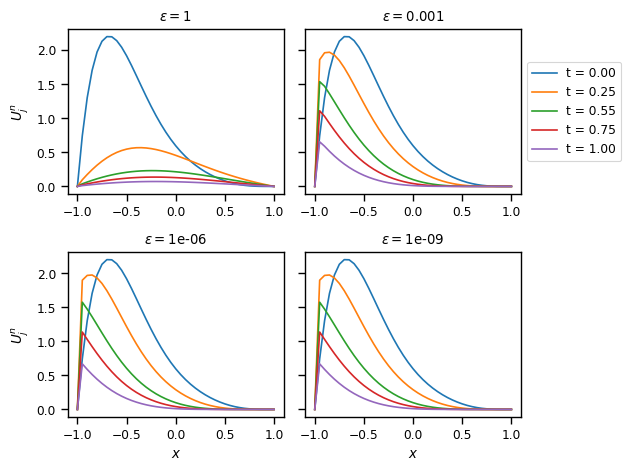

In [34]:
sns.set_context("paper")

h_plot = 2
v_plot = 2
plot_widt = 7
fig, ax = plt.subplots(v_plot, h_plot,  sharey=True) #figsize=(plot_widt, plot_widt*v_plot/h_plot)

max_time_vec = [0,0.25,0.5,0.75,1]
epsilon_vec = [1,1e-3,1e-6, 1e-9]
CFL = 1
theta = 1
markers_vec = ['o','^', "*", ">", "+"]
line_vec= ['dashed', 'dashdot', 'dotted']
colours = sns.color_palette()
colour_index = [1,4,9]
random.seed(15)
b_vec = [random.random() for _ in range(4)]
J_new = 1*J
delta_x_new = (L-Lp)/J_new
delta_t = CFL*delta_x_new/a
x_values = [] 
for j in range(J_new+1): 
    x = Lp + j*delta_x_new
    x_values.append(x)

e = 0
for w in range (v_plot):
    for i in range (h_plot):
        epsilon_new = epsilon_vec[e]
        e = e+1
        #calculate the initial condition U0 when t = 0
        t = 0
        Un = initial_condition (x_values, b_vec)
        m_index = 0
        for t_lim in max_time_vec:
            while t < t_lim:
                t = t + delta_t
                Un1 = Un1_theta_method (Un, delta_t, delta_x_new, theta =theta, epsilon = epsilon_new )
                Un = Un1
            sns.lineplot(x=x_values, y=Un, 
                     # marker=markers_vec[0], 
                     # markersize = 7,
                     label = f"t = {t:.2f}",
                     ax = ax[w,i])
            
            m_index = m_index + 1
            ax[w,i].set_title(r'$\epsilon = $' + str(epsilon_new))
            if (w == 0 and i == 1):
                ax[w,i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
            else:  
                ax[w,i].legend([], [], frameon=False)
            
            
    ax[w,0].set_ylabel(r"$U_j^{n}$")
    
    

ax[w,0].set_xlabel(r"$x$") 
ax[w,1].set_xlabel(r"$x$") 
        

print(b_vec)
plt.tight_layout()
plt.savefig('images/Question8-exploring_epsilon.png', dpi = 500, bbox_inches = 'tight') #facecolor='white'

In [28]:
delta_x_new

0.05